# Generalization with OOP: The SMABacktester Class

## Using the SMABacktester Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
plt.style.use("seaborn")

/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_90219/1603295544.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
df = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
df.head()

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2004-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDEUR=X  4274 non-null   float64
 1   EURUSD=X  4275 non-null   float64
 2   USDGBP=X  4287 non-null   float64
dtypes: float64(3)
memory usage: 134.2 KB


In [4]:
import SMABacktester as SMA

In [5]:
tester = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [6]:
tester

SMABacktester(symbol = EURUSD=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [7]:
tester.test_strategy()

(1.2835, 0.367674)

In [9]:
tester.results.head()

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486


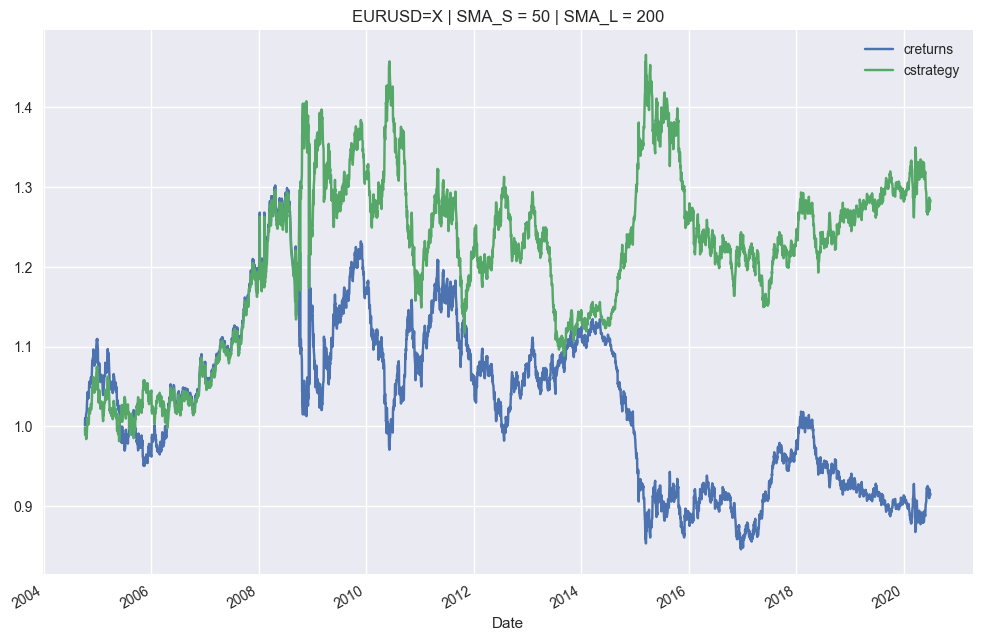

In [10]:
tester.plot_results()

In [11]:
tester.set_parameters(75, 150)

In [12]:
tester.test_strategy()

(1.58974, 0.655896)

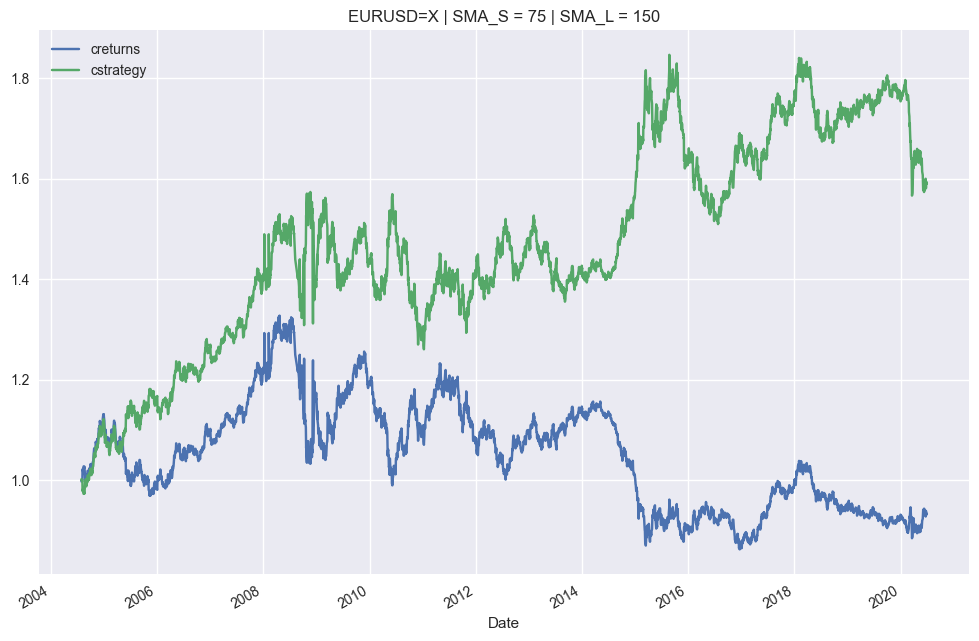

In [13]:
tester.plot_results()

In [14]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

((46, 137), 2.526694)

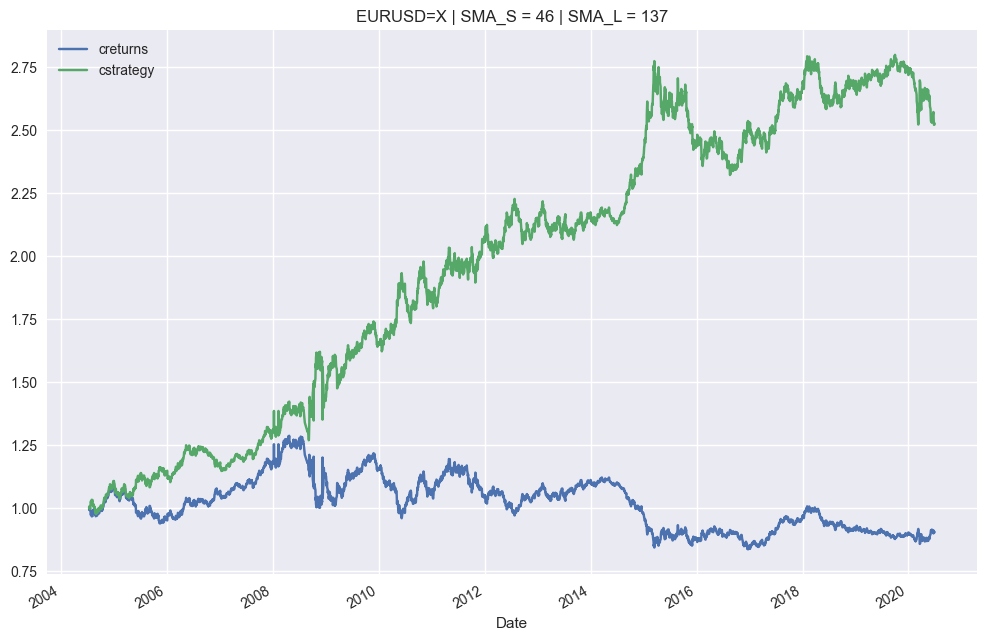

In [15]:
tester.plot_results()

In [16]:
tester.results_overview

,SMA_S,SMA_L,performance
0,25,100,1.236187
1,25,101,1.261659
2,25,102,1.217403
3,25,103,1.305591
4,25,104,1.345555
...,...,...,...
2495,49,195,1.317730
2496,49,196,1.279151
2497,49,197,1.238046
2498,49,198,1.213654


__Backtesting & Forward Testing__

In [17]:
train = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2015-12-31")

In [18]:
train.optimize_parameters((25, 50, 1), (100, 200, 1)) # optimizing strategy & backtesting ("in-sample")

((46, 137), 2.440535)

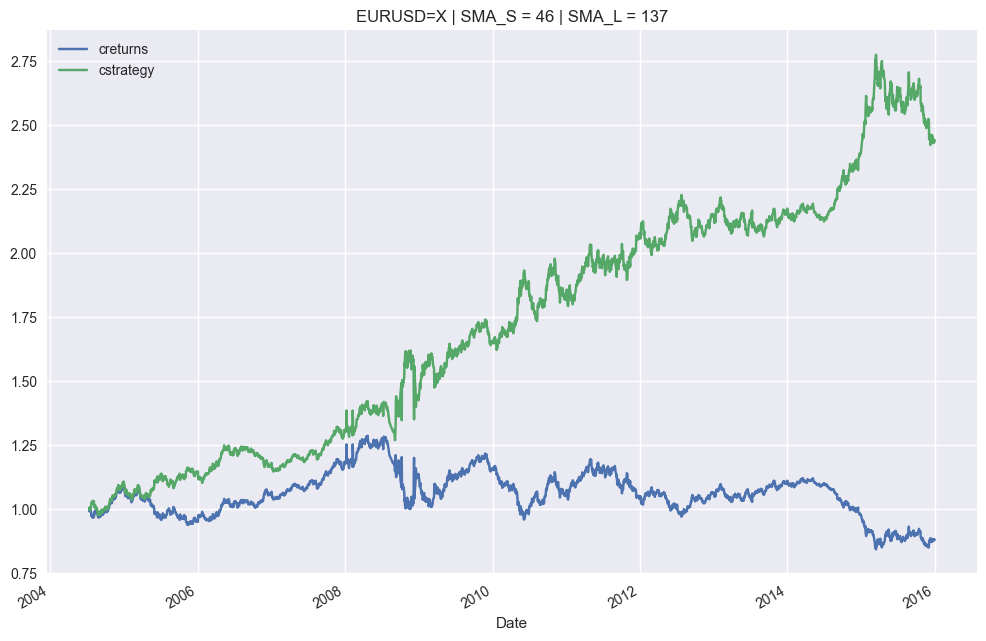

In [19]:
train.plot_results()

In [20]:
train.results_overview.head()

,SMA_S,SMA_L,performance
0,25,100,1.402955
1,25,101,1.418093
2,25,102,1.357323
3,25,103,1.388462
4,25,104,1.424327


In [26]:
SMA_S, SMA_L = train.optimize_parameters((25, 50, 1), (100, 200, 1))[0]
print(SMA_S, SMA_L)

46 137


In [27]:
tester = SMA.SMABacktester("EURUSD=X", SMA_S, SMA_L, "2016-01-01", "2020-06-30")

In [28]:
tester.test_strategy() # forward testing ("out-sample")

(1.056731, 0.038331)

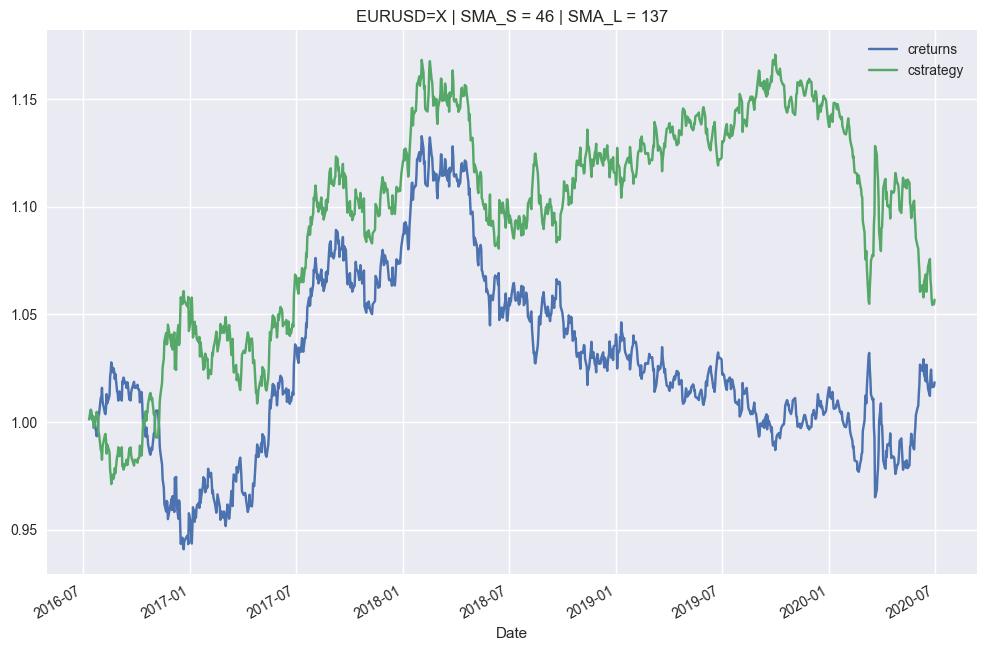

In [29]:
tester.plot_results()

__AUD/EUR__

In [30]:
tester = SMA.SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [31]:
tester.test_strategy()

(1.145599, 0.106464)

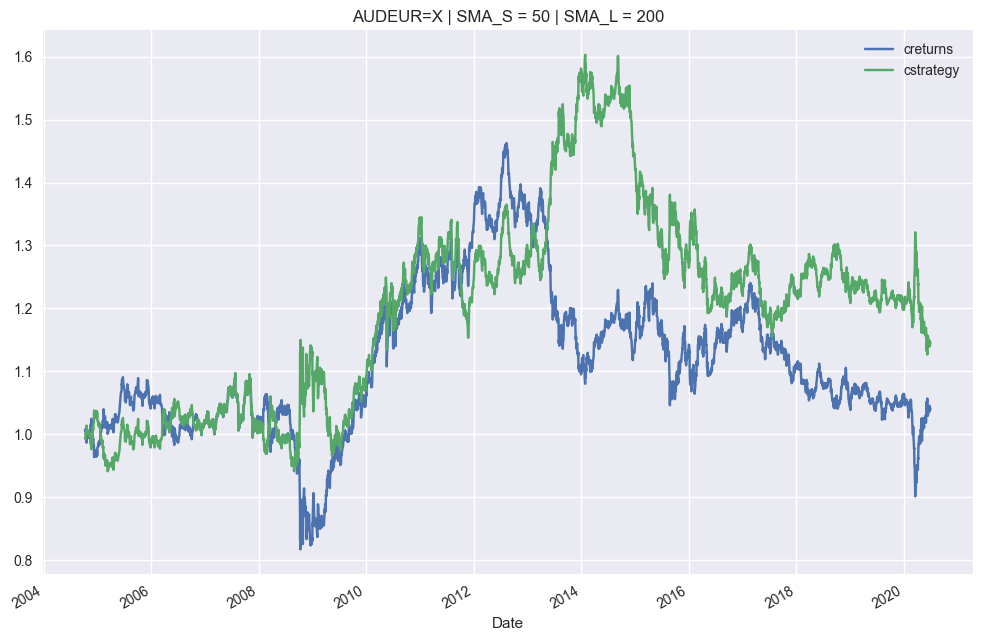

In [32]:
tester.plot_results()

In [33]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

((33, 197), 1.457339)

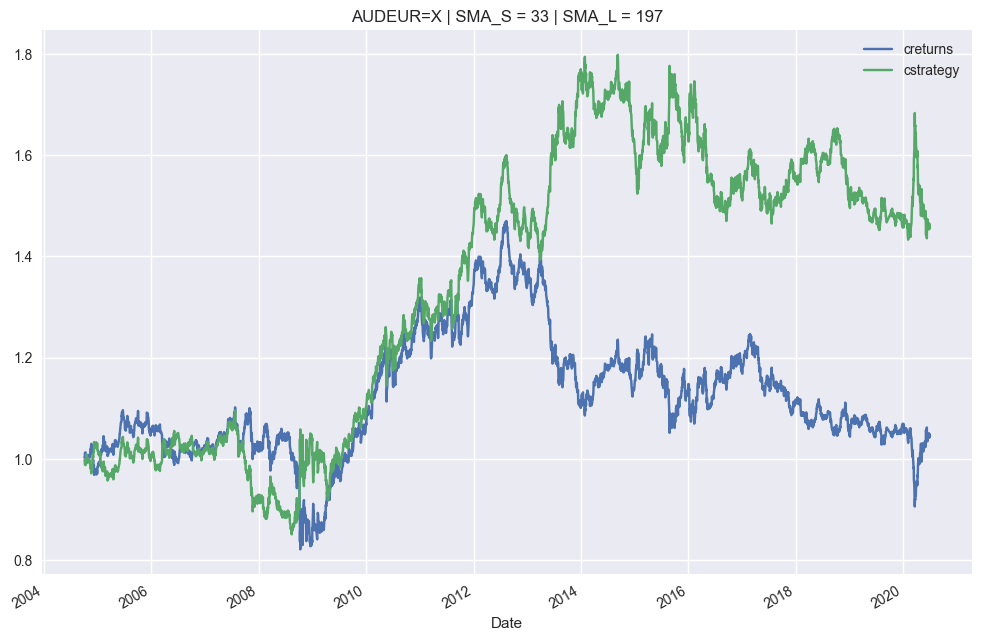

In [34]:
tester.plot_results()

## Building the SMABacktester Class from scratch: Instantiation

In [35]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None # 나중에 고친다. 그냥 선언함.

In [36]:
tester = SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [37]:
tester.symbol

'AUDEUR=X'

In [38]:
tester.SMA_L

200

In [39]:
tester.results

## Method get_data()

In [40]:
raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date") # importing data
raw.head()

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012


In [41]:
raw = raw["AUDEUR=X"].to_frame().dropna() # selecting an instrument
raw.head()

,AUDEUR=X
Date,
2004-01-01,0.59780
2004-01-02,0.60314
2004-01-05,0.60467
2004-01-06,0.60350
2004-01-07,0.60728


In [42]:
raw = raw.loc["2010-01-01":"2012-12-31"].copy() # setting time period 
raw.head()

,AUDEUR=X
Date,
2010-01-01,0.62402
2010-01-04,0.63230
2010-01-05,0.63430
2010-01-06,0.63860
2010-01-07,0.64060


In [43]:
raw.rename(columns={"AUDEUR=X": "price"}, inplace=True) # clean up
raw.head()

,price
Date,
2010-01-01,0.62402
2010-01-04,0.63230
2010-01-05,0.63430
2010-01-06,0.63860
2010-01-07,0.64060


In [44]:
raw["returns"] = np.log(raw / raw.shift(1)) # calculate log returns

In [45]:
raw["SMA_S"] = raw["price"].rolling(50).mean() # add short sma
raw["SMA_L"] = raw["price"].rolling(200).mean() # add long sma

In [47]:
raw.tail()

,price,returns,SMA_S,SMA_L
Date,,,,
2012-12-25,0.7862,-0.002921,0.803610,0.805435
2012-12-26,0.7868,0.000763,0.803618,0.805410
2012-12-27,0.7834,-0.004331,0.803462,0.805372
2012-12-28,0.7825,-0.001149,0.803238,0.805347
2012-12-31,0.7854,0.003699,0.803118,0.805327


In [48]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    

In [54]:
tester = SMABacktester("AUDEUR=X", 50, 200, "2010-01-01", "2019-12-31")

In [56]:
tester.data.tail() # __init__ method에서 자동으로 get_data를 불러왔다.

,price,returns,SMA_S,SMA_L
Date,,,,
2019-12-25,0.62410,-0.000240,0.617223,0.619946
2019-12-26,0.62380,-0.000481,0.617499,0.619907
2019-12-27,0.62550,0.002722,0.617745,0.619901
2019-12-30,0.62441,-0.001744,0.617958,0.619868
2019-12-31,0.62493,0.000833,0.618139,0.619838


In [57]:
tester.get_data().tail()

,price,returns,SMA_S,SMA_L
Date,,,,
2019-12-25,0.62410,-0.000240,0.617223,0.619946
2019-12-26,0.62380,-0.000481,0.617499,0.619907
2019-12-27,0.62550,0.002722,0.617745,0.619901
2019-12-30,0.62441,-0.001744,0.617958,0.619868
2019-12-31,0.62493,0.000833,0.618139,0.619838


## Setting new SMA Paramters

In [58]:
tester.SMA_S

50

In [59]:
tester.SMA_L

200

In [60]:
tester.data.isna().sum() # missing values가 필연적으로 존재

price        0
returns      1
SMA_S       49
SMA_L      199
dtype: int64

In [61]:
tester.SMA_L = 250

In [62]:
tester.SMA_L

250

In [63]:
tester.data.isna().sum() # 249개가 존재해야하지만, update 안되었다. 캡슐화를 통해 해결해야 함.

price        0
returns      1
SMA_S       49
SMA_L      199
dtype: int64

In [64]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S # SMA_S 속성값을 업데이트한다.
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean() # 해당 값으로 덮어쓴다.
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()

In [65]:
tester = SMABacktester("AUDEUR=X", 50, 200, "2010-01-01", "2019-12-31")

In [66]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       49
SMA_L      199
dtype: int64

In [67]:
tester.set_parameters(SMA_S = 25, SMA_L = 150)

In [68]:
tester.SMA_S

25

In [69]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       24
SMA_L      149
dtype: int64

## Testing a Strategy

In [70]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True) # 초반에 생긴 NaN값을 제거한다.
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)

In [71]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [73]:
tester.test_strategy() # absolute performance, outperformance(전략으로 인한 성과-long position 성과)

(1.2835, 0.367674)

In [75]:
tester.data.head()

,price,returns,SMA_S,SMA_L
Date,,,,
2004-01-01,1.258194,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,NaN,NaN
2004-01-05,1.268698,0.008313,NaN,NaN
2004-01-06,1.272103,0.002681,NaN,NaN
2004-01-07,1.264095,-0.006315,NaN,NaN


In [76]:
tester.results.head()

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486


## Plotting the results

In [77]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None: # test_strategy()가 실행되어야 result가 생성된다.
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

In [78]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [79]:
tester.plot_results()

Run test_strategy() first.


In [80]:
tester.test_strategy()

(1.2835, 0.367674)

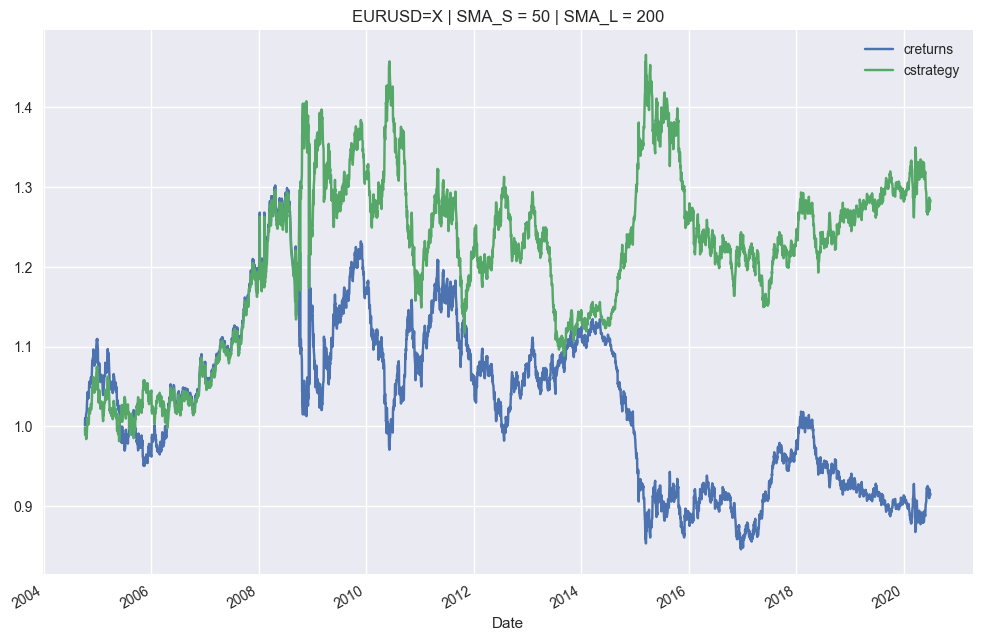

In [81]:
tester.plot_results()

## Strategy Optimization

In [82]:
tester.set_parameters(25, 150)

In [85]:
tester.test_strategy()[0] # 수익률

1.586563

In [89]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def optimize_parameters(self, SMA_S_range, SMA_L_range): 
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range))) # 모든 combination list에 저장
        
        # test all combinations
        results = []
        for comb in combinations: # 모든 combination Test
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) # best performance
        opt = combinations[np.argmax(results)] # optimal parameters
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1]) # optimal parameter로 setting
        self.test_strategy()
                   
        # create a df with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
        many_results["performance"] = results
        self.results_overview = many_results # 모든 combination의 결과값 저장
                            
        return opt, best_perf

In [90]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [91]:
tester.test_strategy()

(1.2835, 0.367674)

In [92]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

((46, 137), 2.526694)

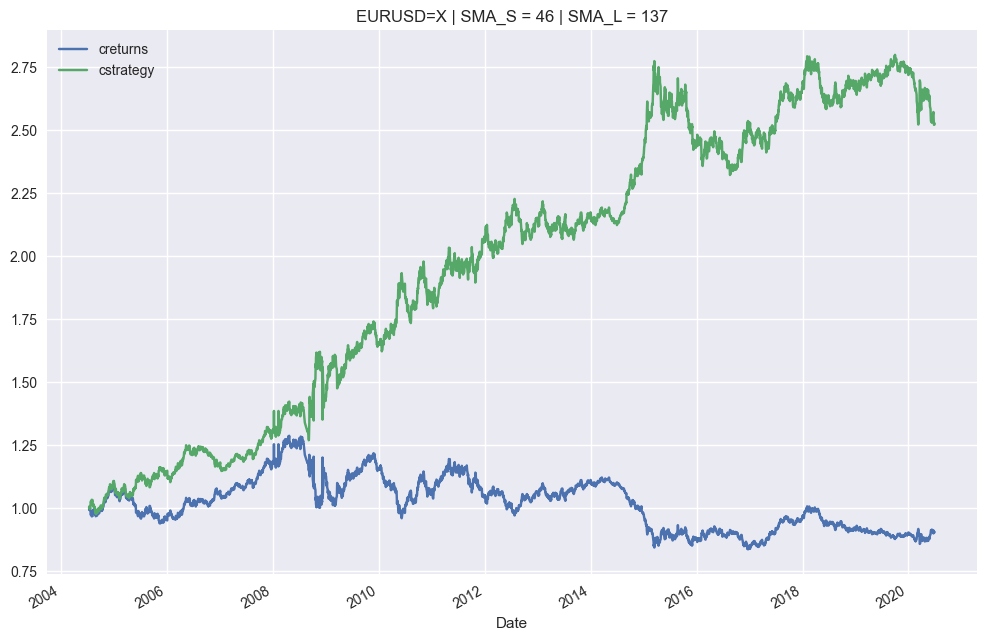

In [93]:
tester.plot_results()

In [95]:
tester.results_overview.head()

,SMA_S,SMA_L,performance
0,10,100,0.919640
1,10,101,0.901791
2,10,102,0.908851
3,10,103,0.917204
4,10,104,0.990232


## Splitting get_data() and adding prepare_data() 

In [101]:
class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None 
        self.get_data() # self.data를 먼저 정의 한 후에
        self.prepare_data() # prepare_data()를 실행해서 self.data를 update
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        
    def prepare_data(self):
        data = self.data.copy()
        data["SMA_S"] = data["price"].rolling(self.SMA_S).mean() # 단기 sma
        data["SMA_L"] = data["price"].rolling(self.SMA_L).mean() # 장기 sma
        self.data = data
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
    
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
        
        # test all combinations
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) # best performance
        opt = combinations[np.argmax(results)] # optimal parameters
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
                   
        # create a df with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
        many_results["performance"] = results
        self.results_overview = many_results
                            
        return opt, best_perf

In [102]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [106]:
tester.data.tail()

,price,returns,SMA_S,SMA_L
Date,,,,
2020-06-24,1.131235,0.002892,1.101794,1.103430
2020-06-25,1.125087,-0.005449,1.102486,1.103540
2020-06-26,1.122208,-0.002562,1.103213,1.103627
2020-06-29,1.122586,0.000337,1.103931,1.103730
2020-06-30,1.124720,0.001899,1.104695,1.103857


In [104]:
tester.test_strategy()

(1.2835, 0.367674)

## String Representation & Docstrings

In [107]:
tester

In [108]:
tester.optimize_parameters()

TypeError: optimize_parameters() missing 2 required positional arguments: 'SMA_S_range' and 'SMA_L_range'

In [109]:
class SMABacktester():
    ''' Class for the vectorized backtesting of SMA-based trading strategies.
    '''
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        SMA_S: int
            moving window in bars (e.g. days) for shorter SMA
        SMA_L: int
            moving window in bars (e.g. days) for longer SMA
        start: str
            start date for data import
        end: str
            end date for data import
        '''
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None 
        self.get_data()
        self.prepare_data()
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})".format(self.symbol, self.SMA_S, self.SMA_L, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data from forex_pairs.csv (source can be changed).
        '''
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        
    def prepare_data(self):
        '''Prepares the data for strategy backtesting (strategy-specific).
        '''
        data = self.data.copy()
        data["SMA_S"] = data["price"].rolling(self.SMA_S).mean()
        data["SMA_L"] = data["price"].rolling(self.SMA_L).mean()
        self.data = data
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and the prepared dataset.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the SMA-based trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
    
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        ''' Finds the optimal strategy (global maximum) given the SMA parameter ranges.

        Parameters
        ----------
        SMA_S_range, SMA_L_range: tuple
            tuples of the form (start, end, step size)
        '''
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
        
        # test all combinations
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) # best performance
        opt = combinations[np.argmax(results)] # optimal parameters
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
                   
        # create a df with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
        many_results["performance"] = results
        self.results_overview = many_results
                            
        return opt, best_perf

In [110]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [111]:
tester

SMABacktester(symbol = EURUSD=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [112]:
tester.optimize_parameters()

TypeError: optimize_parameters() missing 2 required positional arguments: 'SMA_S_range' and 'SMA_L_range'